<a href="https://colab.research.google.com/github/jesme00/jesme00.github.io/blob/main/SupervisedLearningRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Motivation: interrogate the positive relationship between obesity and outdoor utilisation for exercise, i.e. see how strong it is.

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import pylab as plt

In [8]:
data=pd.read_csv('utilisationofoutdoorspaceforexercise.csv')

In [9]:
data

,Region Name,Area Name,Percentage of adults (aged 18+) classified as overweight or obese,Utilisation of outdoor space for exercise or health reasons
0,East,Bedford,63.29,13.23
1,East,Southend-on-Sea,68.83,15.11
2,East,Peterborough,60.70,17.81
3,East,Luton,67.51,20.74
4,East,Central Bedfordshire,65.84,21.24
...,...,...,...,...
108,Yorkshire and The Humber,Doncaster,71.03,19.34
109,Yorkshire and The Humber,Calderdale,63.66,20.45
110,Yorkshire and The Humber,Leeds,63.56,20.53
111,Yorkshire and The Humber,York,63.59,20.86


In [32]:
from pandas.io.formats.info import DataFrameTableBuilder
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = data[['Utilisation of outdoor space for exercise or health reasons']]
y = data[['Percentage of adults (aged 18+) classified as overweight or obese']]

In [33]:
regressor = LinearRegression()
regressor.fit(X, y)


y_pred = regressor.predict(X)
# Calculates R^2
score = regressor.score(X,y)

In [34]:
import seaborn as sns
sns.set()

In [35]:
x = data ['Utilisation of outdoor space for exercise or health reasons'].values
y = data ['Percentage of adults (aged 18+) classified as overweight or obese'].values

Text(0, 0.5, 'Percentage of adults (aged 18+) classified as overweight or obese')

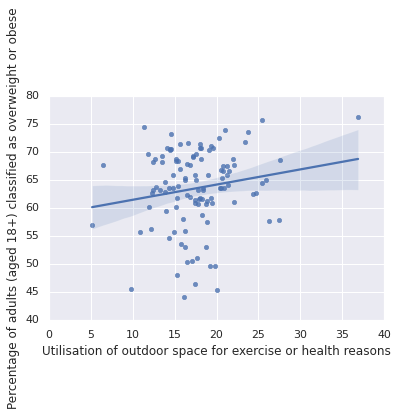

In [36]:
sns.regplot(x='Utilisation of outdoor space for exercise or health reasons',y='Percentage of adults (aged 18+) classified as overweight or obese',data=data)
plt.xlabel('Utilisation of outdoor space for exercise or health reasons')
plt.ylabel('Percentage of adults (aged 18+) classified as overweight or obese')

Despite my understanding that a 0.17 correlation (as seen in my project website) is weak, I thought it would be clearer to understand just how weak by creating a visual. I did this here by plotting utilisation of outdoor space against obesity. As expected, the correlation that I was surprised to find to be positive is confirmed very weak in this chart. I wonder if there are any clustering patterns based on the region of the local authority 

In [37]:
from scipy.stats import linregress
import numpy as np

In [38]:
slope, intercept, rvalue, pvalue, stderr = linregress(x=data.dropna()['Utilisation of outdoor space for exercise or health reasons'], y=data.dropna()['Percentage of adults (aged 18+) classified as overweight or obese'])

In [39]:
print('y = ',np.round(slope,2),' * x + ',np.round(intercept,2))
print('R² = ',np.round(rvalue**2,2))

y =  0.27  * x +  58.76
R² =  0.03


In [51]:
def label_category(row):
    if row['Region Name'] == 'East' :
        return 1
    elif row['Region Name'] == 'East Midlands' :
        return 2
    elif row['Region Name'] == 'London' :
        return 3
    elif row['Region Name'] == 'North East' :
        return 4
    elif row['Region Name'] == 'North West' :
        return 5
    elif row['Region Name'] == 'South East' :
        return 6
    elif row['Region Name'] == 'South West' :
        return 7
    elif row['Region Name'] == 'West Midlands' :
        return 8
    elif row['Region Name'] == 'Yorkshire and The Humber' :
        return 9


data['Region Name'] = data.apply(label_category, axis=1)

data.head(10)

,Region Name,Area Name,Percentage of adults (aged 18+) classified as overweight or obese,Utilisation of outdoor space for exercise or health reasons
0,1,Bedford,63.29,13.23
1,1,Southend-on-Sea,68.83,15.11
2,1,Peterborough,60.70,17.81
3,1,Luton,67.51,20.74
4,1,Central Bedfordshire,65.84,21.24
5,1,Thurrock,76.35,36.90
6,2,Leicester,60.22,11.95
7,2,Nottingham,66.92,15.62
8,2,Derby,65.42,20.66
9,3,Richmond upon Thames,45.54,9.78


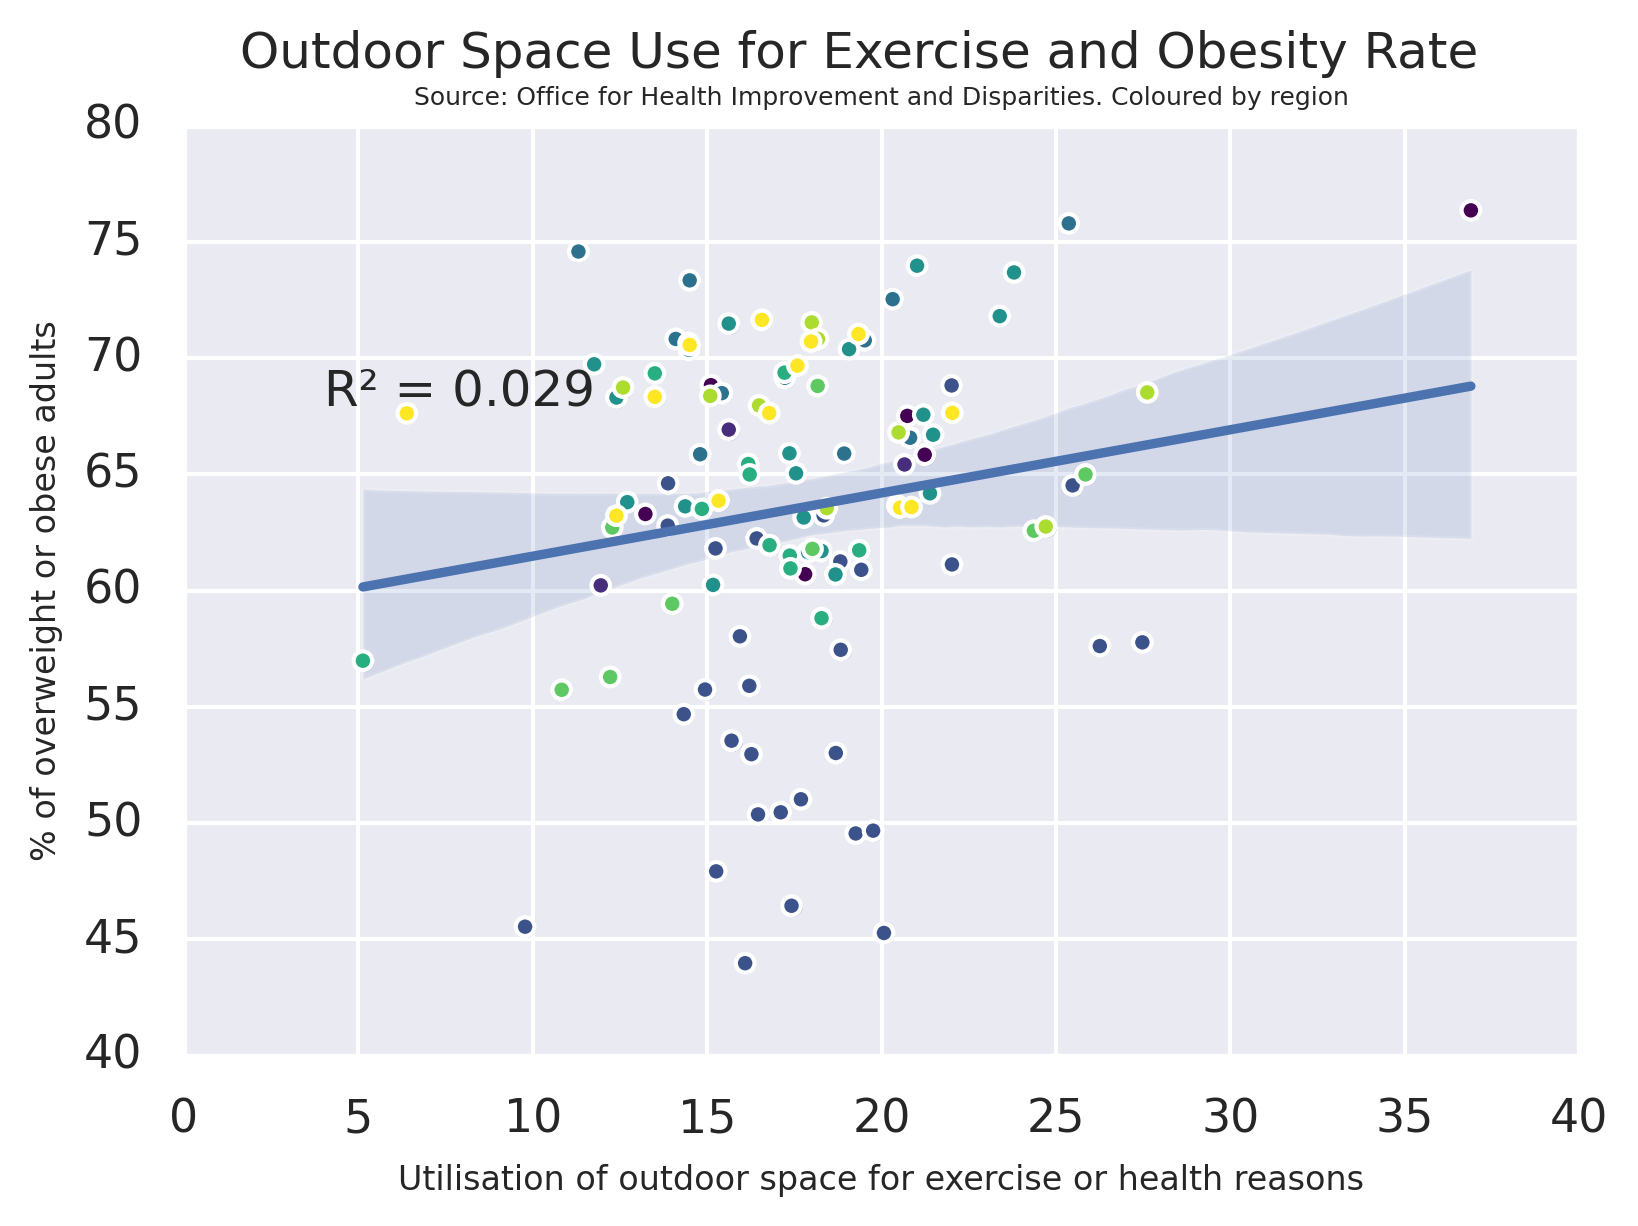

In [82]:
# Ploting the graph, choosing colours, adding a title, naming axis and displaying R^2
plt.rcParams['figure.dpi'] = 300
sns.regplot(x='Utilisation of outdoor space for exercise or health reasons',y='Percentage of adults (aged 18+) classified as overweight or obese',data=data)
plt.xlabel('Utilisation of outdoor space for exercise or health reasons',fontsize=8)
plt.ylabel('% of overweight or obese adults',fontsize=8)
plt.suptitle('Outdoor Space Use for Exercise and Obesity Rate', fontsize=12)
plt.title('Source: Office for Health Improvement and Disparities. Coloured by region', fontsize=6)
plt.annotate(f'R\u00b2 = {score:.3f}', xy=(0.1,0.7), xycoords='axes fraction')
plt.scatter(X, y, c=data['Region Name'], cmap='viridis')
plt.savefig("test.png")
plt.show()
